<a href="https://colab.research.google.com/github/guihrodriguess/guihrodriguess/blob/main/Aula_1_Desafios_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imersão Dados 4**

**Aula 01 - Seu Primeiro Colab com Python e Pandas**


---





In [10]:
#importando biblioteca
#importando, lendo e explorando a base de dados

import pandas as pd
import matplotlib.pyplot as plt

URL= "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"

dados = pd.read_csv(URL)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


Deafio 1 - Realizar a média da metragem para cada um dos bairros



In [11]:
#selecionando as series que serão utillizadas e salvando em um variavel
#agrupando os dados com referência na coluna bairro e tirando a média da outra coluna
#imprindo o resultado arrendodando os valores numericos em duas casas decimais

bairros_metragem = dados.get(['Bairro', 'Metragem']) 
media_metragem_bairros = bairros_metragem.groupby('Bairro').mean() 
media_metragem_bairros.round(2) 

,Metragem
Bairro,
Aclimação,253.06
Alto da Boa Vista,418.88
Alto da Lapa,294.34
Alto da Mooca,270.05
Alto de Pinheiros,433.44
...,...
Vila Água Funda,152.20
Água Branca,191.00
Água Fria,165.42


Desafio 2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas).

In [12]:
#utilizando o parametro ".get" juntamente com comparação boleanda para filrar a serie bairro e salvar

primeira_forma = dados[dados.get('Bairro') == 'Vila Mariana']
primeira_forma.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000


In [13]:
#utilizando o operador  ".eq" e possivel fazer a comparação por linhas e colunas com resultado booleano

segunda_forma = dados[dados.Bairro.eq('Vila Mariana')]
segunda_forma.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000


Desafio 3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão.

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

<Figure size 864x720 with 0 Axes>

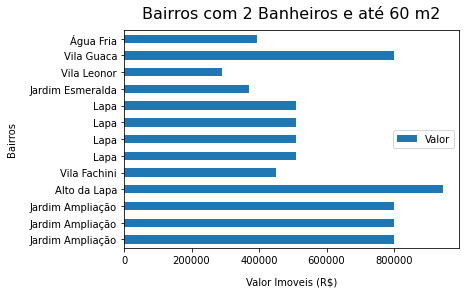

In [28]:
#selecionando os dados conforme caracteristicas de qtd banheiros e metragem
#realizando tratamento da coluna valor separando por moeda e rescrevendo o valor sobre coluna antiga
#tratamento do tipo de dado da serie valor 
#criação de gráfico do tipo barra na horizontal

bairros_banheiro = dados[(dados['Banheiros'] == 2) & (dados['Metragem'] <= 60)]
bairros_banheiro[['Moeda', 'Valor']] = bairros_banheiro['Valor'].str.split( expand =  True)
bairros_banheiro['Valor'] = bairros_banheiro['Valor'].str.replace('.','').astype(float)

#gerando gráfico e configurando tamanho do mesmo
plt.figure( figsize =( 12, 10))
ax = bairros_banheiro.plot.barh( x = 'Bairro', y = 'Valor')


#acrescentando os titulo, alterando os noms dos eixos e configurando.
ax.set_title('Bairros com 2 Banheiros e até 60 m2', color = 'black', fontsize = 16, pad = 12)
plt.ylabel('Bairros', color = 'black', labelpad = 12)
plt.xlabel('Valor Imoveis (R$)', color = 'black', labelpad = 12)
plt.show()

No gráfico foi realizada uma pesquisa na base de São Paulo a fim de identificar os bairros com moveis com as seguintes caracteristicas: 

*   Com até dois banheiros.
*   Com metragem de até 60 m2.

Nota-se que os bairros que apresentam melhor custo, em relação as caracterisictas solicitadas são: Vila Leonor, Jardim Esmeralda e Água Fria

Desafio 4 - Pegar outras estatísticas dos dados (como média, mediana, mim, max).

In [17]:
#criada nova base para exclusão de colunas sem tratamento adequado e valores irrelevantes
#criação de variaveis com dados estatisticos
#criação de base estatisticas concatenando todas as variaveis

dados_drop = dados
dados_drop = dados_drop.drop(columns=['Valor', 'Cidade'])

minimo = dados_drop.min().rename('Minimo')
maximo = dados_drop.max().rename('Maximo')
media = dados_drop.mean().rename('Media')
mediana = dados_drop.median().rename('Mediana')

estatisticas =  pd.concat([minimo, media, mediana, maximo], axis=1)
estatisticas


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

,Minimo,Media,Mediana,Maximo
Metragem,10,442.300659,290.0,750000
Quartos,1,3.483114,3.0,16
Banheiros,1,3.879097,4.0,40
Vagas,1,4.097222,4.0,50


Desafio 5 - Descobrir quais são os bairros que não tem nome de rua.

In [18]:
#criada variavel para salvar todos as ruas que possue celular vazias
#criado filtro dentro da base dados
#gerado uma tabela com  a quantidade de rua que não possuem nome por bairro

dados_rua_vazio = pd.isna(dados['Rua'])
filter_dados = dados[dados_rua_vazio]
filter_dados['Bairro'].value_counts()

Jardim Guedala                      190
Alto de Pinheiros                   169
Jardim Paulista                     138
Jardim Europa                       128
Jardim Leonor                       118
                                   ... 
Jardim do Colégio (Zona Norte)        1
Alto da Boa Vista                     1
Jardim Aeroporto                      1
Conjunto Residencial Vista Verde      1
Jardim Santo Elias                    1
Name: Bairro, Length: 394, dtype: int64